Check the geometry of LSLGA galaxies derived from ellipse-fitting against the original geometry from Hyperleda.

In [2]:
import os, glob
import fitsio
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import vstack, Table, hstack

In [3]:
import seaborn as sns
sns.set(context='talk', style='ticks', font_scale=1.0)
%matplotlib inline

In [4]:
lslgaver = b'L6'
lslgafile = '/global/cfs/cdirs/desi/users/ioannis/LSLGA-data-DR9fg/LSLGA-model-v6.0.fits'
#lslgafile = '/global/project/projectdirs/cosmo/staging/largegalaxies/v6.0/LSLGA-model-v6.0.fits'
#lslgafile = os.getenv('LARGEGALAXIES_CAT')
lslga = Table(fitsio.read(lslgafile))
print('Read {} galaxies from {}'.format(len(lslga), lslgafile))
#lslga

Read 516182 galaxies from /global/cfs/cdirs/desi/users/ioannis/LSLGA-data-DR9fg/LSLGA-model-v6.0.fits


### Geometry comparison of LSLGA galaxies

In [5]:
plslga = lslga[lslga['REF_CAT'] == lslgaver]

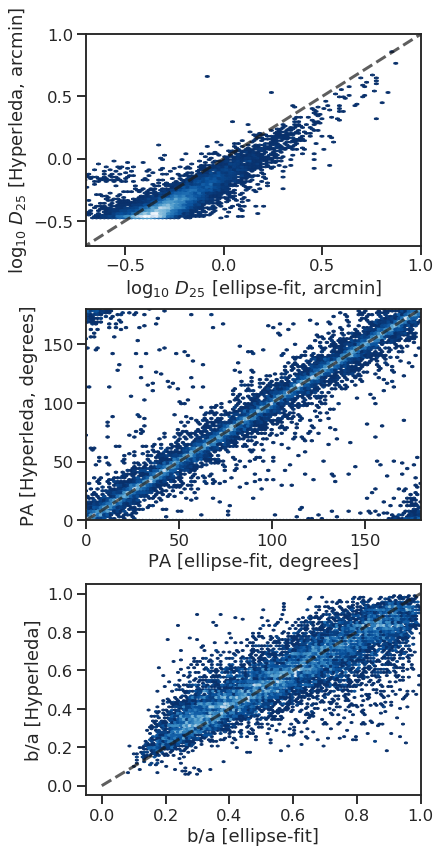

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 14))
ax1.hexbin(np.log10(plslga['D25']), np.log10(plslga['D25_ORIG']), mincnt=1,
          cmap=plt.cm.Blues_r)
#ax1.scatter(np.log10(lslga['D25']), np.log10(lslga['D25_ORIG']), s=15)
ax1.set_xlim(-0.7, 1)
ax1.set_ylim(-0.7, 1)
ax1.plot([-1, 1], [-1, 1], color='k', ls='--', lw=3, alpha=0.7)
ax1.set_xlabel(r'$\log_{10}\ D_{25}$ [ellipse-fit, arcmin]')
ax1.set_ylabel(r'$\log_{10}\ D_{25}$ [Hyperleda, arcmin]')

ax2.hexbin(plslga['PA'], plslga['PA_ORIG'], mincnt=1,
           cmap=plt.cm.Blues_r)
ax2.set_xlabel('PA [ellipse-fit, degrees]')
ax2.set_ylabel('PA [Hyperleda, degrees]')
ax2.plot([0, 180], [0, 180], color='k', ls='--', lw=3, alpha=0.7)

ax3.hexbin(plslga['BA'], plslga['BA_ORIG'], mincnt=1,
           cmap=plt.cm.Blues_r)
ax3.set_xlabel('b/a [ellipse-fit]')
ax3.set_ylabel('b/a [Hyperleda]')
ax3.plot([0, 1], [0, 1], color='k', ls='--', lw=3, alpha=0.7)

fig.subplots_adjust(hspace=0.3)

In [7]:
lslga[(lslga['LSLGA_ID'] > 0) * (lslga['D25'] == 0)]

<Table length=0>
LSLGA_ID  GALAXY  PGC     RA   ... MAG_Z_SB26 MAG_G_TOT MAG_R_TOT MAG_Z_TOT
 int64   bytes29 int64 float64 ...  float32    float32   float32   float32 
-------- ------- ----- ------- ... ---------- --------- --------- ---------

In [8]:
ff = Table.read('/global/cfs/cdirs/desi/users/ioannis/LSLGA-data-DR9fg/LSLGA-reject-v6.0.fits')
ff

<Table length=51>
   NAME            RA                 DEC          ...    PA       BA    
  str23         float64             float64        ... float32  float32  
---------- ------------------ -------------------- ... ------- ----------
PGC1089160 31.915563000000002           -2.5404093 ...   179.0 0.63095737
PGC1365237 205.68884999999997               9.4471 ...    35.0  0.5011872
PGC1148178 213.77019600000003 -0.24621329999999997 ...  105.38  0.3715352
 PGC051602         216.798717    53.62396700000001 ...     0.0  0.9036495
PGC1292230 209.27348850000004    5.967253400000001 ...   19.19  0.8317638
PGC2057027 151.57805549999998           34.9447186 ...   102.0   0.724436
PGC2482646 216.05176500000002   54.858253500000004 ...   107.0 0.74131024
PGC2482655 216.05574149999998    54.85876460000001 ...   128.0  0.8709636
PGC1173289         217.190877   0.7050901999999999 ...   97.67 0.60255957
PGC1104284 176.15639249999998  -2.0016971999999997 ...    49.0 0.61659503
       ...                ...                  ... ...     ...        ...
 PGC057003 241.21054649999996   23.974919699999997 ...  105.87   0.691831
PGC1050534  38.89802699999999           -5.0090736 ...   147.0  0.8912509
PGC1495540        268.3525665   15.883047099999999 ...   168.0 0.53703177
PGC2168941        273.2373615            40.652626 ...    58.0 0.45708817
PGC1083351          37.285917           -2.7690556 ...     0.0 0.91201085
PGC1541189 269.40276150000005           17.7699718 ...    43.0 0.64565426
 PGC091604         265.365441            18.654812 ...    84.4 0.23442288
PGC2202123 223.60356900000002           42.5960588 ...    31.0 0.66069347
PGC1035237 31.851553499999994            -6.229975 ...    72.0 0.48977882
PGC3111236        217.7676615           -0.3254203 ...     0.0  0.8892011

In [9]:
rr = Table.read('/global/cfs/cdirs/desi/users/ioannis/LSLGA-data-DR9fg/LSLGA-inspect-v6.0.fits')
rr

<Table length=193>
      NAME              RA                 DEC         ...    PA        BA    
     str23           float64             float64       ... float32   float32  
--------------- ------------------ ------------------- ... -------- ----------
      PGC050965 214.02195450000002           -1.260376 ...   172.83  0.5675446
     PGC2183601         224.205969          41.5963809 ...   172.38 0.40926066
     PGC1167205          35.657589           0.4857232 ...    70.11 0.22387213
     PGC1943146        138.8469825          31.3520025 ...   148.86 0.63095737
      PGC140295        214.6570965            2.045988 ...    76.99 0.34673685
     PGC2024569        136.5774585          33.1421389 ...     45.5 0.66069347
     PGC2239206        281.4302925           44.210889 ...    172.0 0.53703177
     PGC2208915 281.97150000000005             42.9184 ...      2.0   0.691831
      PGC061664        274.0392315          42.6562809 ...     48.5 0.27542287
DR8-555740-1273   274.056780340244    42.6784958375118 ... 90.41192 0.29153687
            ...                ...                 ... ...      ...        ...
     PGC2729390         146.089947   69.29439359999999 ...   124.33  0.7585776
     PGC1113006 213.96330000000003 -1.6775794999999998 ...     54.0 0.61659503
     PGC2189971         281.315085           41.964401 ...    101.0 0.56234133
       UGC06970        179.6914245          -1.4617597 ...     77.0  0.4295364
     PGC1598935        261.2312505  19.610916699999997 ...     86.0  0.4168694
     PGC1222845         211.547523  2.3120727000000003 ...    52.61  0.5495409
      PGC050297         211.539162           2.3311414 ...   160.02 0.54575783
     PGC1131556         174.264381 -0.9117808000000001 ...      0.0 0.78886014
     PGC1356619         206.158926           8.9385451 ...   116.97  0.5011872
           LeoA 149.86041666666665   30.74638888888889 ...    102.0   0.613762

### Compare the various sizes

In [10]:
plslga.colnames

['LSLGA_ID',
 'GALAXY',
 'PGC',
 'RA',
 'DEC',
 'TYPE',
 'BAR',
 'RING',
 'MULTIPLE',
 'COMPACTNESS',
 'T',
 'PA',
 'D25',
 'BA',
 'DIAM_REF',
 'Z',
 'SB_D25',
 'MAG',
 'MAG_REF',
 'WISE_RA',
 'WISE_DEC',
 'CNTR',
 'W1MPRO',
 'W1SIGMPRO',
 'W2MPRO',
 'W2SIGMPRO',
 'W3MPRO',
 'W3SIGMPRO',
 'W4MPRO',
 'W4SIGMPRO',
 'RCHI2',
 'CC_FLAGS',
 'EXT_FLG',
 'PH_QUAL',
 'XSCPROX',
 'W1RSEMI',
 'W1BA',
 'W1PA',
 'W1GMAG',
 'W1GERR',
 'W2GMAG',
 'W2GERR',
 'W3GMAG',
 'W3GERR',
 'W4GMAG',
 'W4GERR',
 'IN_ALLWISE',
 'IN_DESI_NORTH',
 'IN_DESI_NORTH_GRZ',
 'IN_DESI_SOUTH',
 'IN_DESI_SOUTH_GRZ',
 'IN_DESI',
 'IN_DESI_GRZ',
 'GROUP_ID',
 'GROUP_NAME',
 'GROUP_MULT',
 'GROUP_PRIMARY',
 'GROUP_RA',
 'GROUP_DEC',
 'GROUP_DIAMETER',
 'NEAR_BRIGHTSTAR',
 'LSLGA_RA',
 'LSLGA_DEC',
 'MORPHTYPE',
 'D25_ORIG',
 'PA_ORIG',
 'BA_ORIG',
 'RELEASE',
 'BRICKID',
 'BRICKNAME',
 'OBJID',
 'BRICK_PRIMARY',
 'BRIGHTBLOB',
 'MASKBITS',
 'ITERATIVE',
 'RA_IVAR',
 'DEC_IVAR',
 'BX',
 'BY',
 'DCHISQ',
 'EBV',
 'MJD_MIN',
 'M

In [11]:
def qa_radii(ax, xx, yy, xlim, ylim):
    ax.hexbin(np.log10(xx), np.log10(yy), mincnt=1, cmap=plt.cm.Blues_r)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    #ax.plot([-1, 1], [-1, 1], color='k', ls='--', lw=3, alpha=0.7)
    #ax.set_xlabel(r'$\log_{10}\ D_{25}$ [ellipse-fit, arcmin]')
    #ax.set_ylabel(r'$\log_{10}\ D_{25}$ [Hyperleda, arcmin]')    

REX 1.1897559
DEV 1.3185232
EXP 1.210517
SER 1.247677
Median over all types: 1.2485


/global/common/software/desi/cori/desiconda/20190311-1.2.7-img/conda/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20190311-1.2.7-img/conda/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in log10


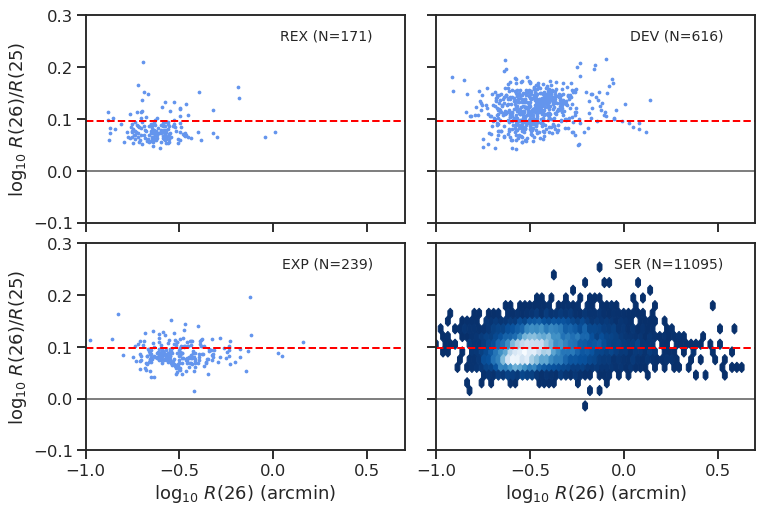

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharey=True, sharex=True)
for ax1, typ in zip(ax.flat, ['REX', 'DEV', 'EXP', 'SER']):
    ww = np.where(plslga['TYPE'] == typ)[0]
    xx = plslga['RADIUS_SB26'][ww] / 60 
    yy = plslga['RADIUS_SB26'][ww] / plslga['RADIUS_SB25'][ww]
    print(typ, np.median(yy))
    ax1.set_xlim(-1, 0.7)
    ax1.set_ylim(-0.1, 0.3)
    ax1.axhline(y=0, ls='-', lw=2, color='gray')
    ax1.axhline(y=np.log10(1.25), ls='--', lw=2, color='red')
    if typ == 'SER':
        ax1.hexbin(np.log10(xx), np.log10(yy), mincnt=1, cmap=plt.cm.Blues_r)
    else:
        ax1.scatter(np.log10(xx), np.log10(yy), s=5, color='cornflowerblue')
    ax1.text(0.9, 0.9, '{} (N={})'.format(typ, len(ww)), 
             transform=ax1.transAxes, ha='right', va='center',
             fontsize=14)
ax[0, 0].set_ylabel(r'$\log_{10}\ R(26) / R(25)$')
ax[1, 0].set_ylabel(r'$\log_{10}\ R(26) / R(25)$')
ax[1, 0].set_xlabel(r'$\log_{10}\ R(26)$ (arcmin)')
ax[1, 1].set_xlabel(r'$\log_{10}\ R(26)$ (arcmin)')
fig.subplots_adjust(hspace=0.1, wspace=0.1)
print('Median over all types: {:.4f}'.format(np.median(plslga['RADIUS_SB26'] / plslga['RADIUS_SB25'])))

REX 1.4780828
DEV 1.8161318
EXP 1.5054811
SER 1.5931568
Median over all types: 1.5964


/global/common/software/desi/cori/desiconda/20190311-1.2.7-img/conda/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20190311-1.2.7-img/conda/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in log10


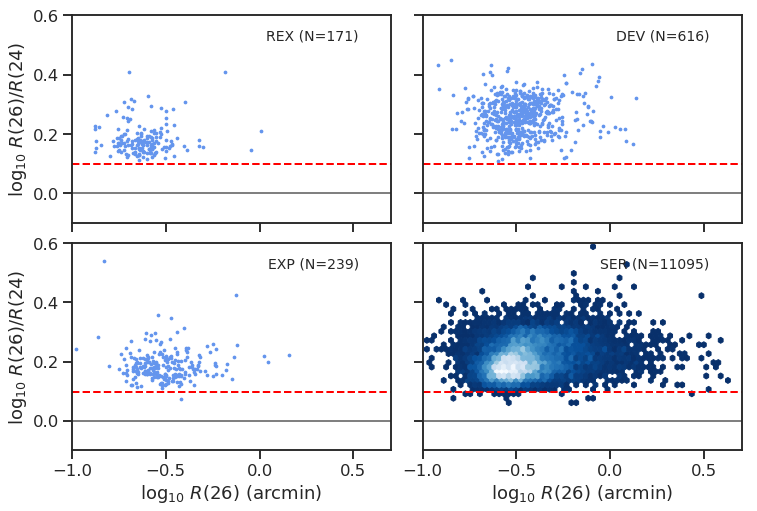

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharey=True, sharex=True)
for ax1, typ in zip(ax.flat, ['REX', 'DEV', 'EXP', 'SER']):
    ww = np.where(plslga['TYPE'] == typ)[0]
    xx = plslga['RADIUS_SB26'][ww] / 60 
    yy = plslga['RADIUS_SB26'][ww] / plslga['RADIUS_SB24'][ww]
    print(typ, np.median(yy))
    ax1.set_xlim(-1, 0.7)
    ax1.set_ylim(-0.1, 0.6)
    ax1.axhline(y=0, ls='-', lw=2, color='gray')
    ax1.axhline(y=np.log10(1.25), ls='--', lw=2, color='red')
    if typ == 'SER':
        ax1.hexbin(np.log10(xx), np.log10(yy), mincnt=1, cmap=plt.cm.Blues_r)
    else:
        ax1.scatter(np.log10(xx), np.log10(yy), s=5, color='cornflowerblue')
    ax1.text(0.9, 0.9, '{} (N={})'.format(typ, len(ww)), 
             transform=ax1.transAxes, ha='right', va='center',
             fontsize=14)
ax[0, 0].set_ylabel(r'$\log_{10}\ R(26) / R(24)$')
ax[1, 0].set_ylabel(r'$\log_{10}\ R(26) / R(24)$')
ax[1, 0].set_xlabel(r'$\log_{10}\ R(26)$ (arcmin)')
ax[1, 1].set_xlabel(r'$\log_{10}\ R(26)$ (arcmin)')
fig.subplots_adjust(hspace=0.1, wspace=0.1)
print('Median over all types: {:.4f}'.format(np.median(plslga['RADIUS_SB26'] / plslga['RADIUS_SB24'])))